<a href="https://colab.research.google.com/github/yahelrl19/ParkingLotProject/blob/main/ParkingLotProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parking Lot Project

Link: https://paperswithcode.com/paper/revising-deep-learning-methods-in-parking-lot

GitHub: https://github.com/eighonet/parking-research

Dataset: https://www.kaggle.com/datasets/braunge/aerial-view-car-detection-for-yolov5/data


## Importando librerías

In [ ]:
#!/usr/bin/env python
## -*- coding: utf-8 -*-
__author__ = ["Marcos Yahel Ramos Lara"]
__credits__ = ["Marcos Yahel Ramos Lara"]
__license__ = "MIT"
__version__ = "0.0.1"
__maintainer__ = ["Marcos Yahel Ramos Lara"]
__email__ = "marcos.ramos@edu.uag.mx"
__status__ = "Production"

"""Importando librerías necesarias"""
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

## Descarga del dataset

In [ ]:
def download_dataset():
    """
    Descarga el dataset directamente desde una URL y lo descomprime.
    """
    print("Descargando dataset directamente desde la URL...")
    # URL del dataset (puedes ajustar esta URL si es necesario)
    dataset_url = "https://www.kaggle.com/api/v1/datasets/download/braunge/aerial-view-car-detection-for-yolov5"

    # Descargar el dataset
    os.system(f'curl -L -o aerial-view-car-detection.zip "{dataset_url}"')

    # Descomprimir el archivo descargado
    os.system('unzip -q aerial-view-car-detection.zip -d ./dataset')
    print("Dataset descargado y descomprimido correctamente.")

download_dataset()

Descargando dataset directamente desde la URL...
Dataset descargado y descomprimido correctamente.


## Configuración de directorios

In [ ]:
"""
Se definen los directorios donde se almacenan las imágenes originales y las modificadas
"""
DATASET_ORIGINAL_DIR = '/content/dataset/mydata/mydata'
DATASET_MODIFIED_DIR = '/content/dataset_modified/mydata/mydata'
TRAIN_IMAGES_DIR = os.path.join(DATASET_ORIGINAL_DIR, 'images/train')
TEST_IMAGES_DIR = os.path.join(DATASET_ORIGINAL_DIR, 'images/test')
MODIFIED_TRAIN_IMAGES_DIR = os.path.join(DATASET_MODIFIED_DIR, 'images/train')
MODIFIED_TEST_IMAGES_DIR = os.path.join(DATASET_MODIFIED_DIR, 'images/test')

print("Directorios configurados correctamente.")

Directorios configurados correctamente.


## Configuración del Entorno

In [ ]:
"""
Descargando YOLOv5 y sus dependencias
"""
print("Instalando dependencias y configurando el entorno...")
os.system('pip install torch torchvision opencv-python matplotlib -q')  # Instalación de bibliotecas
os.system('git clone https://github.com/ultralytics/yolov5')  # Clonar el repositorio YOLOv5
os.chdir('yolov5')  # Cambiar al directorio del repositorio
os.system('pip install -r requirements.txt')  # Instalar dependencias de YOLOv5
print("Entorno configurado correctamente.")

Instalando dependencias y configurando el entorno...
Entorno configurado correctamente.


## Visualización del dataset original

Visualizando un ejemplo del dataset...


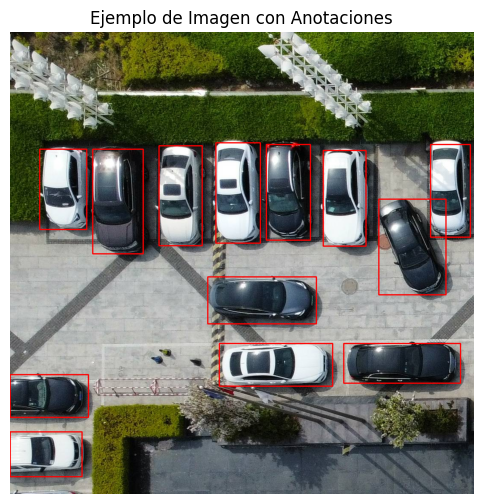

In [ ]:
def visualize_dataset(images_dir, labels_dir):
    """
    Muestra una imagen del dataset junto con sus etiquetas.
    :images_dir: Directorio que contiene las imágenes.
    :labels_dir: Directorio que contiene las etiquetas.
    """
    print("Visualizando un ejemplo del dataset...")
    # Listar archivos de imágenes y etiquetas
    image_files = sorted(os.listdir(images_dir))
    label_files = sorted(os.listdir(labels_dir))

    # Seleccionar una imagen y su etiqueta correspondiente
    sample_image_path = os.path.join(images_dir, image_files[0])
    sample_label_path = os.path.join(labels_dir, label_files[0])

    # Leer la imagen
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer las etiquetas
    with open(sample_label_path, 'r') as f:
        labels = f.readlines()

    # Dibujar las cajas delimitadoras en la imagen
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.strip().split())
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Mostrar la imagen con las anotaciones
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Ejemplo de Imagen con Anotaciones")
    plt.show()

visualize_dataset(TRAIN_IMAGES_DIR, os.path.join(DATASET_ORIGINAL_DIR, 'labels/train'))

## Creación del Archivo YAML

In [ ]:
def create_yaml():
    """
    Crea un archivo YAML con la configuración del dataset.
    Este archivo es utilizado por YOLOv5 para entrenar el modelo.
    """
    yaml_content = """
    train: /content/dataset/mydata/mydata/images/train
    val: /content/dataset/mydata/mydata/images/test
    nc: 1
    names: ['car']
    """
    yaml_path = '/content/dataset/mydata128.yaml'
    with open(yaml_path, 'w') as yaml_file:
        yaml_file.write(yaml_content)  # Guardar el archivo YAML
    print(f"Archivo YAML creado en {yaml_path}")
    return yaml_path

## Entrenamiento de YOLOv5

In [ ]:
!python train.py --img 640 --batch 16 --epochs 30 --data /content/dataset/mydata128.yaml --weights yolov5s.pt --cache
# 991244d7c90cd6f5682eafadfaf4a982e9d302c8

## Validación del modelo

In [ ]:
!python val.py --weights runs/train/exp/weights/best.pt --data /content/dataset/mydata128.yaml --img 640

val: data=/content/dataset/mydata128.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/dataset/mydata/mydata/labels/test.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.28s/it]
                   all         19        459      0.896      0.948      0.973      0.627
Speed: 0.2ms pre-process, 27.8ms inference, 37.5ms NMS per image at shape (32, 3, 640, 640)

## Visualizando las imagenes de validación

Visualizando 7 imágenes de validación con detecciones...



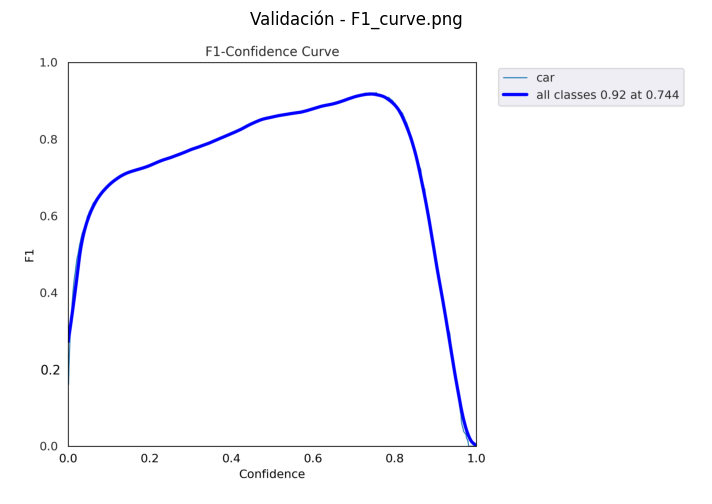

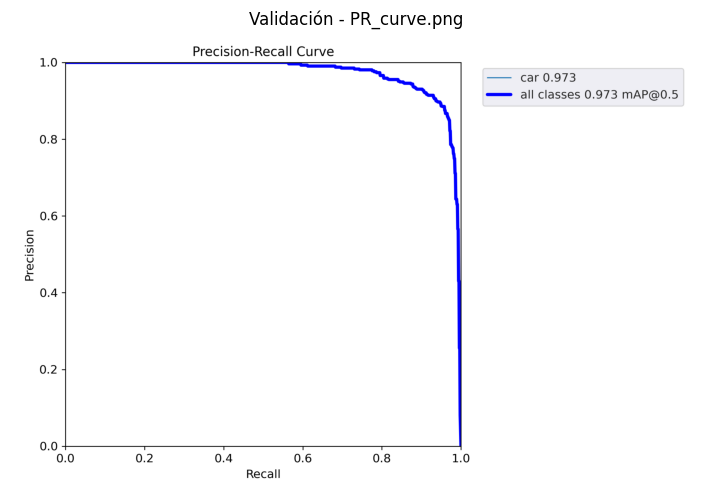

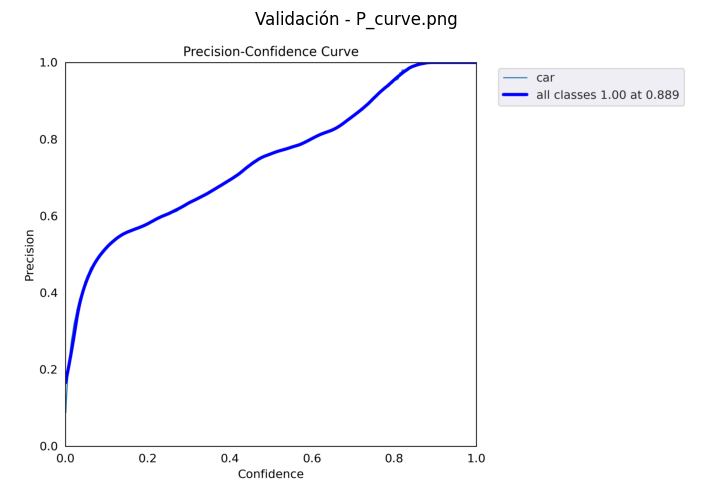

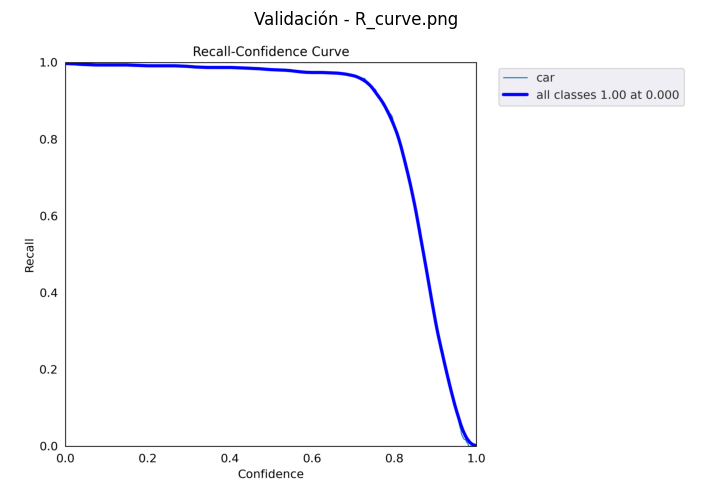

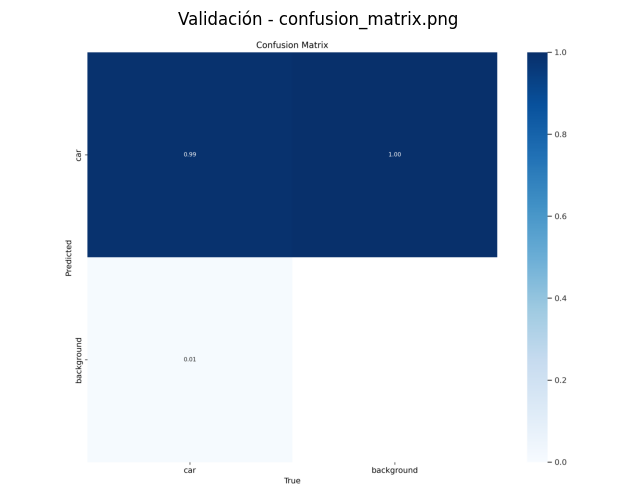

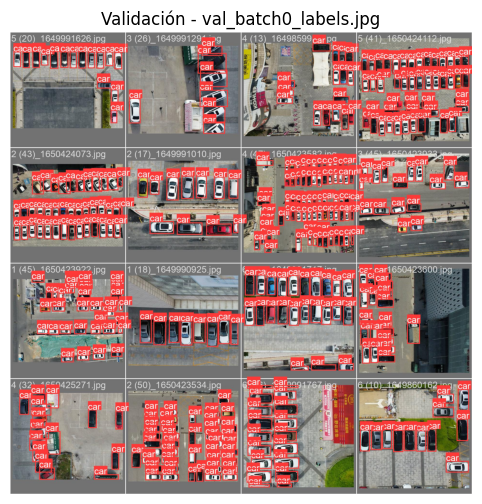

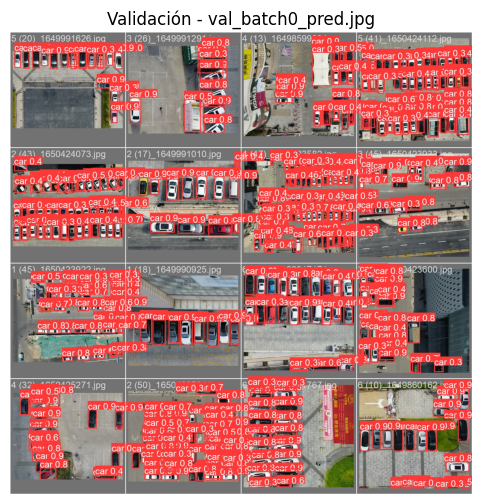

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

def visualize_validation_results(results_dir):
    """
    Visualiza las imágenes procesadas durante la validación con las detecciones.
    :param results_dir: Directorio donde están guardadas las imágenes procesadas durante la validación.
    """
    images_dir = os.path.join(results_dir, "exp")

    # Listar todas las imágenes procesadas
    image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))])

    print(f"Visualizando {len(image_files)} imágenes de validación con detecciones...\n")

    # Iterar sobre las imágenes procesadas y mostrarlas
    for image_file in image_files:
        image_path = os.path.join(images_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB para matplotlib

        # Mostrar la imagen con detecciones
        plt.figure(figsize=(10, 6))
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Validación - {image_file}")
        plt.show()

# Visualizar imágenes de validación
visualize_validation_results("runs/val")

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --source /content/dataset/mydata/mydata/images/test --img 640 --conf 0.5 --save-txt --save-conf --project runs/detect

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/dataset/mydata/mydata/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /content/dataset/mydata/mydata/images/test/1 (18)_1649990925.jpg: 544x640 8 cars, 38.6ms
image 2/19 /content/dataset/mydata/mydata/images/test/1 (4)_1649859559.jpg: 640x608 4 cars, 37.8ms
image 3/19 /content/dataset/mydata/mydata/images/test/1 (45)_1650423922.jpg: 512x6

## Modificación del dataset

In [ ]:
def modify_images(input_dirs, output_dirs):
    """
    Aplica modificaciones al dataset, como ruido, cambios de brillo y desenfoque.
    :input_dirs: Diccionario con directorios de entrada (originales).
    :output_dirs: Diccionario con directorios de salida (modificados).
    """
    def modify_image(image):
        # Añadir ruido gaussiano
        noise = np.random.normal(0, 25, image.shape).astype('uint8')
        noisy_image = cv2.add(image, noise)
        # Ajustar brillo y contraste
        bright_contrast_image = cv2.convertScaleAbs(noisy_image, alpha=1.2, beta=30)
        # Aplicar desenfoque
        return cv2.GaussianBlur(bright_contrast_image, (5, 5), 0)

    print("Modificando imágenes del dataset...")
    for key in input_dirs:
        input_dir = input_dirs[key]
        output_dir = output_dirs[key]
        os.makedirs(output_dir, exist_ok=True)  # Crear directorios de salida si no existen
        for file_name in tqdm(os.listdir(input_dir), desc=f'Modificando {key} imágenes'):
            input_path = os.path.join(input_dir, file_name)
            output_path = os.path.join(output_dir, file_name)
            image = cv2.imread(input_path)
            if image is not None:
                modified_image = modify_image(image)
                cv2.imwrite(output_path, modified_image)  # Guardar la imagen modificada
    print("Imágenes modificadas correctamente.")

modify_images(
    input_dirs={"train": TRAIN_IMAGES_DIR, "test": TEST_IMAGES_DIR},
    output_dirs={"train": MODIFIED_TRAIN_IMAGES_DIR, "test": MODIFIED_TEST_IMAGES_DIR}
)

Modificando imágenes del dataset...


Modificando test imágenes: 100%|██████████| 19/19 [00:02<00:00,  6.62it/s]

Imágenes modificadas correctamente.


## Visualización del dataset modificado

Visualizando un ejemplo del dataset modificado...


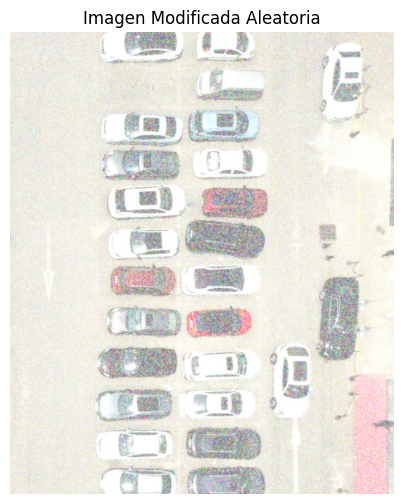

In [ ]:
def visualize_modified_dataset(images_dir):
    """
    Muestra una imagen aleatoria del dataset modificado.
    :images_dir: Directorio que contiene las imágenes modificadas.
    """
    print("Visualizando un ejemplo del dataset modificado...")
    # Listar archivos de imágenes
    image_files = sorted(os.listdir(images_dir))

    # Seleccionar una imagen aleatoria
    random_image_path = os.path.join(images_dir, random.choice(image_files))

    # Leer la imagen
    image = cv2.imread(random_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Imagen Modificada Aleatoria")
    plt.show()

visualize_modified_dataset(MODIFIED_TRAIN_IMAGES_DIR)


## Detección con dataset modificado

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --source /content/dataset_modified/mydata/mydata/images/test --img 640 --conf 0.5 --save-txt --save-conf --project runs/detect

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/dataset_modified/mydata/mydata/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /content/dataset_modified/mydata/mydata/images/test/1 (18)_1649990925.jpg: 544x640 3 cars, 37.8ms
image 2/19 /content/dataset_modified/mydata/mydata/images/test/1 (4)_1649859559.jpg: 640x608 1 car, 38.2ms
image 3/19 /content/dataset_modified/mydata/mydata/image

## Comparación de Datasets

In [ ]:
def analyze_image_metrics(directory):
    """
    Calcula métricas de brillo, contraste y ruido para todas las imágenes en un directorio.
    :param directory: Directorio que contiene las imágenes a analizar.
    :return: DataFrame con las métricas para cada imagen.
    """
    results = []

    # Iterar sobre todas las imágenes en el directorio
    for image_file in tqdm(os.listdir(directory), desc=f"Analizando imágenes en {directory}"):
        image_path = os.path.join(directory, image_file)

        # Leer la imagen
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            continue

        # Calcular métricas
        brightness = np.mean(image)  # Promedio de valores de píxeles
        contrast = np.std(image)    # Desviación estándar de los valores de píxeles
        noise = np.mean(np.abs(image - cv2.GaussianBlur(image, (5, 5), 0)))  # Diferencia entre la imagen y una suavizada

        # Guardar resultados
        results.append({
            "Image": image_file,
            "Brightness": brightness,
            "Contrast": contrast,
            "Noise": noise
        })

    return pd.DataFrame(results)


Analizando el dataset original...


Analizando imágenes en runs/detect/exp3: 100%|██████████| 20/20 [00:00<00:00, 61.52it/s]


Analizando el dataset modificado...


Analizando imágenes en runs/detect/exp2: 100%|██████████| 20/20 [00:00<00:00, 61.10it/s]



Comparativa entre datasets:
                    Image  Brightness_Diff  Contrast_Diff  Noise_Diff
0   3 (26)_1649991291.jpg        97.576715     -18.792244  -18.168013
1   2 (17)_1649991010.jpg        91.913966     -17.641444  -25.593342
2   3 (45)_1650423933.jpg        94.717009     -16.629861  -21.198337
3   6 (39)_1650424380.jpg        96.073426     -11.780058  -18.597439
4   5 (29)_1650425730.jpg       103.510231     -22.356616  -25.565552
5   3 (48)_1650423600.jpg       106.551761     -10.059710   -5.300386
6   4 (32)_1650425271.jpg        99.305430     -19.213270  -22.321735
7   6 (26)_1649991767.jpg        91.299254     -15.788688  -25.766686
8   4 (47)_1650423582.jpg        87.424309      -2.565922  -16.538884
9   6 (10)_1649860162.jpg        94.807671     -16.951626  -28.230353
10  2 (50)_1650423534.jpg        85.793276      -5.426951  -15.606076
11  5 (41)_1650424112.jpg        84.715096      -4.726210  -19.005723
12  1 (45)_1650423922.jpg        90.043950      -8.240612  -2

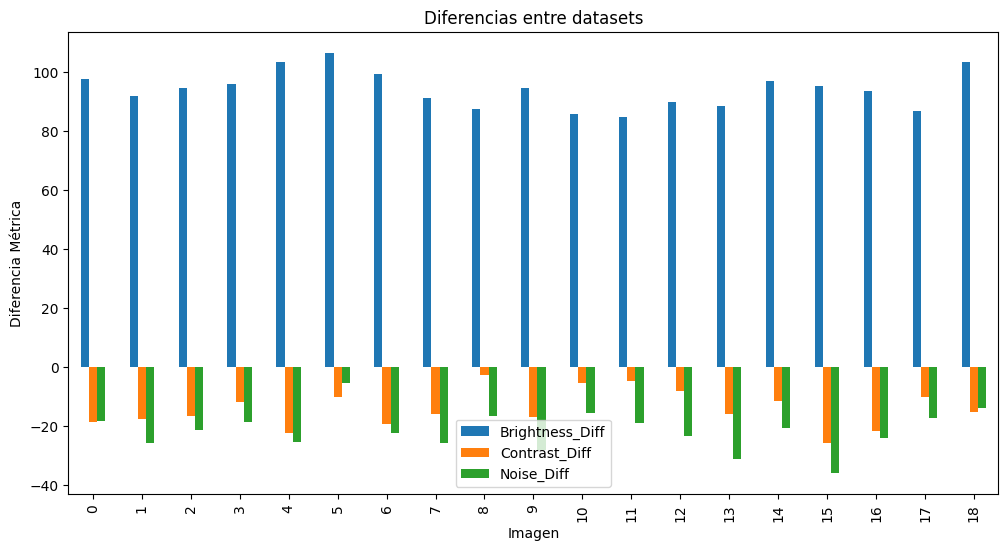

In [ ]:
def compare_datasets_metrics(original_dir, modified_dir):
    """
    Compara las métricas de brillo, contraste y ruido entre dos datasets.
    :param original_dir: Directorio que contiene las imágenes del dataset original.
    :param modified_dir: Directorio que contiene las imágenes del dataset modificado.
    """
    # Analizar ambos datasets
    print("Analizando el dataset original...")
    original_metrics = analyze_image_metrics(original_dir)

    print("Analizando el dataset modificado...")
    modified_metrics = analyze_image_metrics(modified_dir)

    # Combinar resultados en un solo DataFrame
    comparison = pd.merge(
        original_metrics,
        modified_metrics,
        on="Image",
        suffixes=("_Original", "_Modified")
    )

    # Calcular diferencias
    comparison["Brightness_Diff"] = comparison["Brightness_Modified"] - comparison["Brightness_Original"]
    comparison["Contrast_Diff"] = comparison["Contrast_Modified"] - comparison["Contrast_Original"]
    comparison["Noise_Diff"] = comparison["Noise_Modified"] - comparison["Noise_Original"]

    # Mostrar resultados
    print("\nComparativa entre datasets:")
    print(comparison[["Image", "Brightness_Diff", "Contrast_Diff", "Noise_Diff"]])

    # Graficar las diferencias
    comparison[["Brightness_Diff", "Contrast_Diff", "Noise_Diff"]].plot(kind="bar", figsize=(12, 6), title="Diferencias entre datasets")
    plt.xlabel("Imagen")
    plt.ylabel("Diferencia Métrica")
    plt.show()

# Directorios de los datasets
original_dir = "runs/detect/exp3"  # Cambiar si es necesario
modified_dir = "runs/detect/exp2"  # Cambiar si es necesario

# Comparar métricas entre los datasets
compare_datasets_metrics(original_dir, modified_dir)


Analizando el dataset original...


Analizando imágenes en runs/detect/exp3: 100%|██████████| 20/20 [00:00<00:00, 61.74it/s]


Analizando el dataset modificado...


Analizando imágenes en runs/detect/exp2: 100%|██████████| 20/20 [00:00<00:00, 61.63it/s]


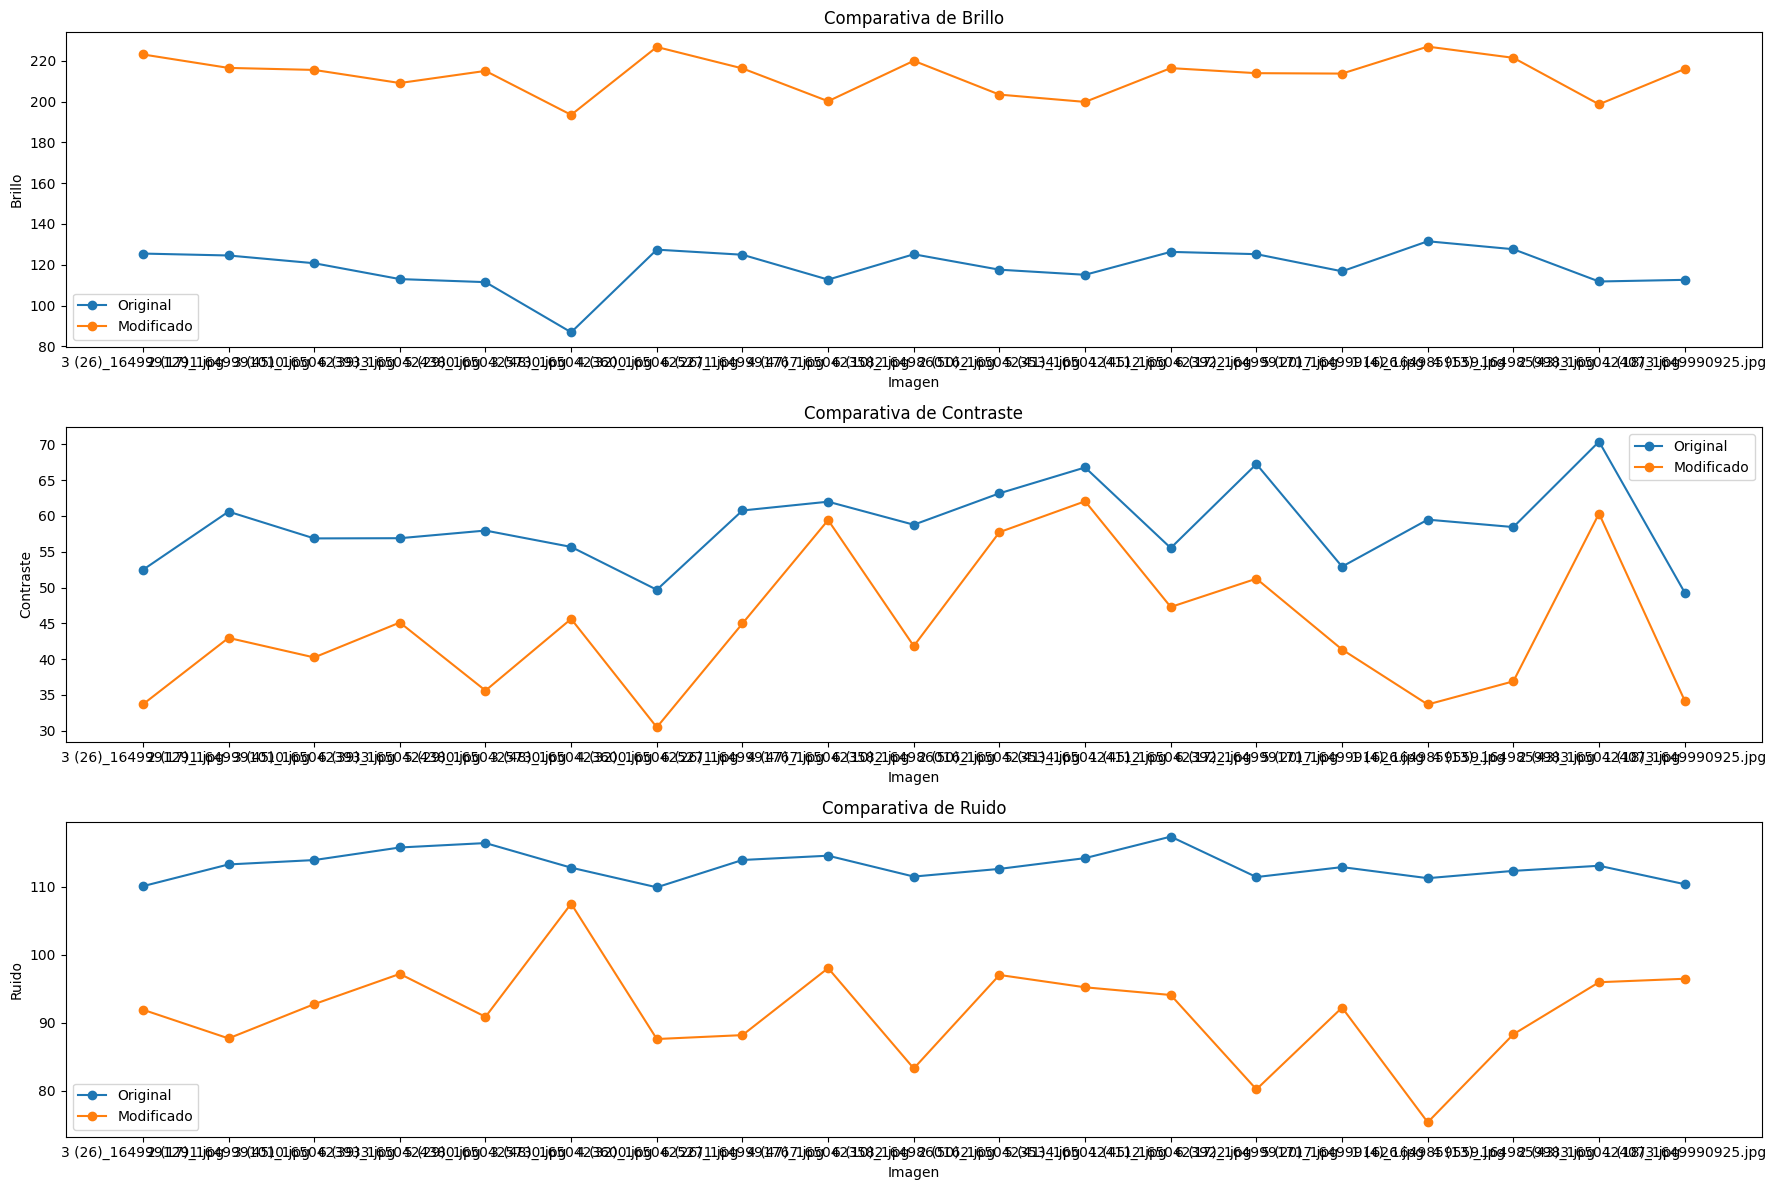

In [ ]:
import matplotlib.pyplot as plt

def compare_datasets_metrics_visual(original_dir, modified_dir):
    """
    Compara las métricas de brillo, contraste y ruido entre dos datasets y las representa gráficamente.
    :param original_dir: Directorio que contiene las imágenes del dataset original.
    :param modified_dir: Directorio que contiene las imágenes del dataset modificado.
    """
    # Analizar ambos datasets
    print("Analizando el dataset original...")
    original_metrics = analyze_image_metrics(original_dir)

    print("Analizando el dataset modificado...")
    modified_metrics = analyze_image_metrics(modified_dir)

    # Combinar resultados en un solo DataFrame
    comparison = pd.merge(
        original_metrics,
        modified_metrics,
        on="Image",
        suffixes=("_Original", "_Modified")
    )

    # Graficar comparaciones
    plt.figure(figsize=(18, 12))

    # Comparativa de brillo
    plt.subplot(3, 1, 1)
    plt.plot(comparison["Image"], comparison["Brightness_Original"], label="Original", marker='o')
    plt.plot(comparison["Image"], comparison["Brightness_Modified"], label="Modificado", marker='o')
    plt.title("Comparativa de Brillo")
    plt.xlabel("Imagen")
    plt.ylabel("Brillo")
    plt.legend()

    # Comparativa de contraste
    plt.subplot(3, 1, 2)
    plt.plot(comparison["Image"], comparison["Contrast_Original"], label="Original", marker='o')
    plt.plot(comparison["Image"], comparison["Contrast_Modified"], label="Modificado", marker='o')
    plt.title("Comparativa de Contraste")
    plt.xlabel("Imagen")
    plt.ylabel("Contraste")
    plt.legend()

    # Comparativa de ruido
    plt.subplot(3, 1, 3)
    plt.plot(comparison["Image"], comparison["Noise_Original"], label="Original", marker='o')
    plt.plot(comparison["Image"], comparison["Noise_Modified"], label="Modificado", marker='o')
    plt.title("Comparativa de Ruido")
    plt.xlabel("Imagen")
    plt.ylabel("Ruido")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Directorios de los datasets
original_dir = "runs/detect/exp3"  # Cambiar si es necesario
modified_dir = "runs/detect/exp2"  # Cambiar si es necesario

# Comparar métricas entre los datasets con visualización
compare_datasets_metrics_visual(original_dir, modified_dir)


## Comparando detecciones

Comparando 5 imágenes del dataset original y modificado...



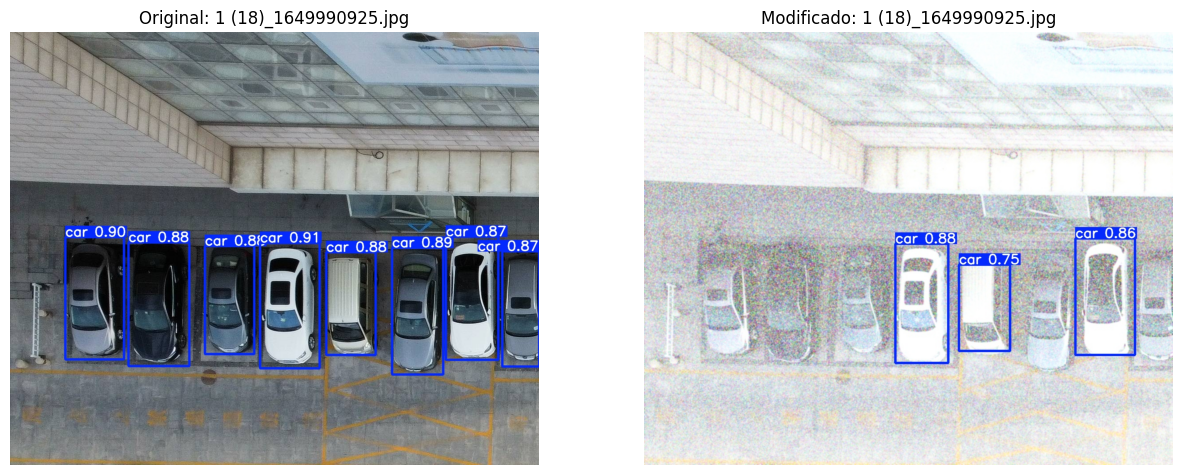

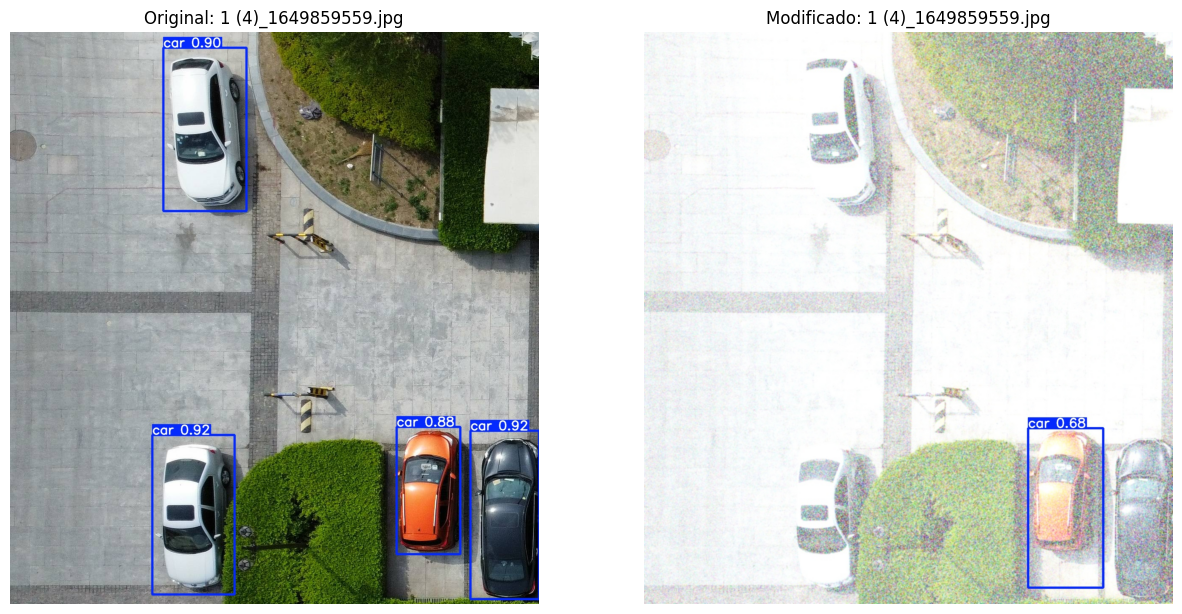

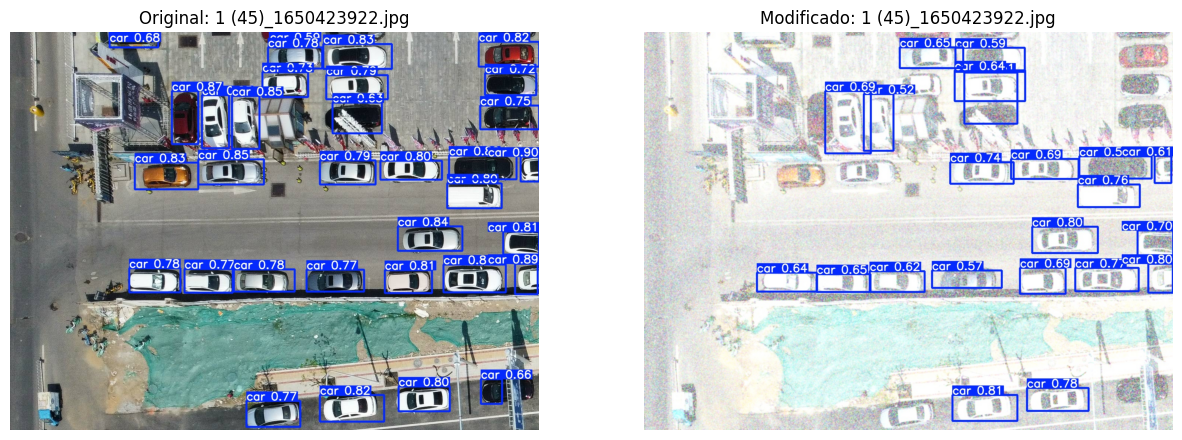

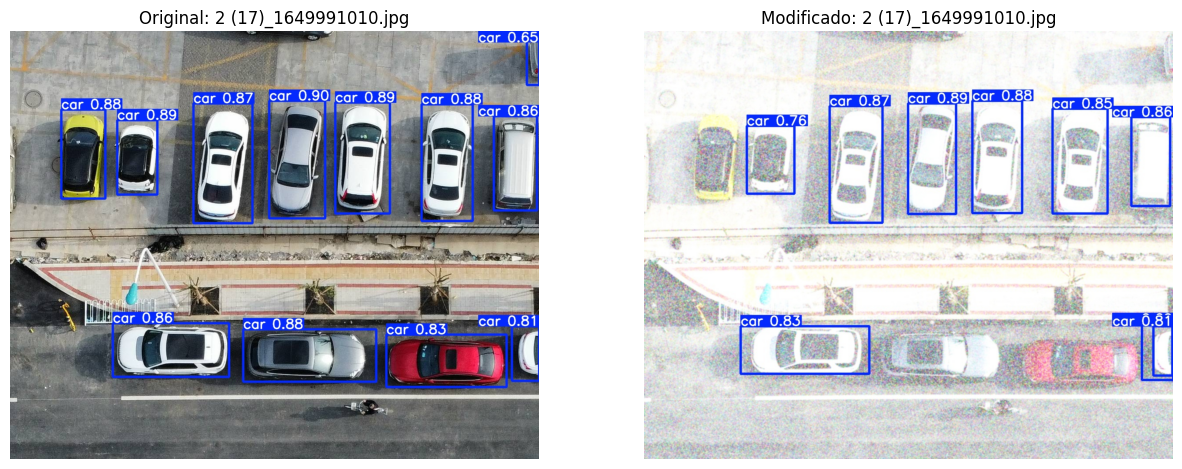

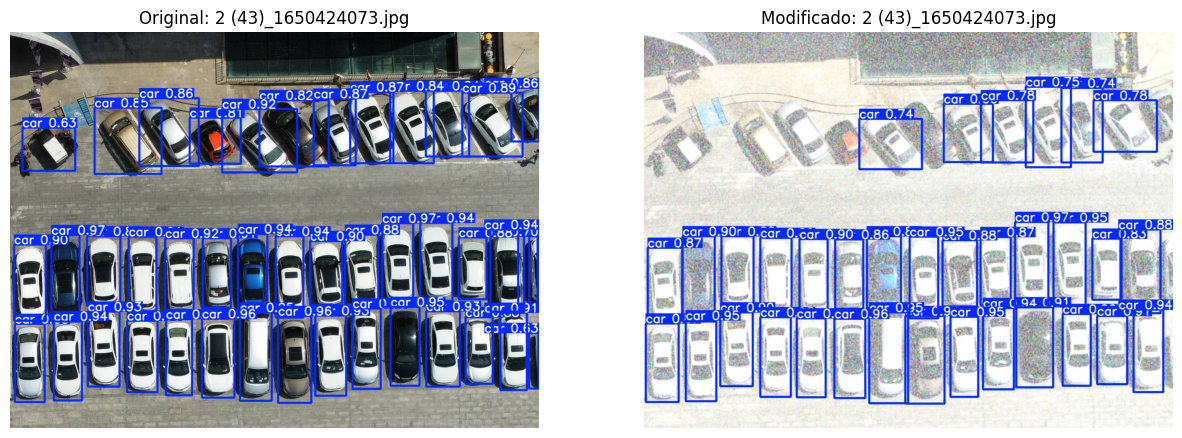

In [ ]:
def compare_detections(original_dir, modified_dir, num_images=5):
    """
    Compara las detecciones entre el dataset original y el modificado, mostrando imágenes lado a lado.
    :param original_dir: Directorio con las imágenes procesadas del dataset original.
    :param modified_dir: Directorio con las imágenes procesadas del dataset modificado.
    :param num_images: Número de imágenes a comparar (por defecto, 5).
    """
    # Listar imágenes en ambos directorios
    original_images = sorted([f for f in os.listdir(original_dir) if f.endswith(('.jpg', '.png'))])
    modified_images = sorted([f for f in os.listdir(modified_dir) if f.endswith(('.jpg', '.png'))])

    # Asegurarnos de que haya suficientes imágenes para comparar
    num_images = min(num_images, len(original_images), len(modified_images))

    print(f"Comparando {num_images} imágenes del dataset original y modificado...\n")

    # Seleccionar las primeras `num_images` imágenes comunes
    for i in range(num_images):
        # Rutas de las imágenes
        original_path = os.path.join(original_dir, original_images[i])
        modified_path = os.path.join(modified_dir, modified_images[i])

        # Cargar las imágenes
        original_img = cv2.imread(original_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        modified_img = cv2.imread(modified_path)
        modified_img = cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB)

        # Mostrar imágenes lado a lado
        plt.figure(figsize=(15, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.axis('off')
        plt.title(f"Original: {original_images[i]}")

        plt.subplot(1, 2, 2)
        plt.imshow(modified_img)
        plt.axis('off')
        plt.title(f"Modificado: {modified_images[i]}")

        plt.show()

# Directorios con imágenes procesadas
original_results_dir = "runs/detect/exp3"
modified_results_dir = "runs/detect/exp2"

# Comparar detecciones
compare_detections(original_results_dir, modified_results_dir, num_images=5)